Titanic Survival EDA and Feature Analysis
Introduction

The sinking of the RMS Titanic in 1912 is one of the most studied disasters, with well-documented patterns in passenger survival. Exploratory Data Analysis (EDA) can uncover how various features (like age, gender, class, fare, family size, etc.) influenced survival, providing insights for building a predictive model. A famous observation from the tragedy is “women and children first” – indeed about 74% of female passengers survived versus only ~20% of male passengers, and roughly 52% of children (age < 16) survived
anesi.com
. Social class also played a role: first-class passengers had a much higher survival rate (~61%) than third-class passengers (~24%)
titanicfacts.net
. However, as we’ll see, gender and age often outweighed class – for example, a third-class woman had better odds of survival than a first-class man
anesi.com
. In this report, we delve into the Titanic passenger data to explore such patterns and discover creative features that could improve a machine learning survival model.

Data – We use the classic Titanic dataset consisting of 891 training examples (with known survival outcomes) and 418 test examples (survival to predict), plus a gender-based submission file. Each passenger has features:

Pclass (passenger class: 1st, 2nd, 3rd),

Sex (gender),

Age,

SibSp (number of siblings/spouses aboard),

Parch (number of parents/children aboard),

Ticket (ticket number), Fare,

Cabin,

Embarked (port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton).

In [2]:
# Upload ZIP
from google.colab import files
uploaded = files.upload()

# Unzip
!unzip titanic.zip

# Read CSVs
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')


Saving titanic.zip to titanic.zip
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)
train.head(3)


(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Among notable issues, Age is missing for 177 passengers (~20%) in the training set (and ~19% in test), and Cabin is missing for ~77% of passengers, so Cabin will need special handling (perhaps using just the presence or extracting the deck letter). There are 2 missing values in Embarked, which we can fill with the most common port (Southampton)

/tmp/ipython-input-3407223818.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Sex', y='Survived', data=train, ci=None)


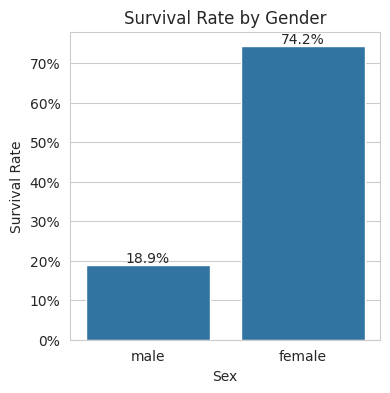

In [4]:
import seaborn as sns, matplotlib.pyplot as plt
import matplotlib.ticker as mtick
sns.set_style('whitegrid')

# Plot survival rate by Sex
plt.figure(figsize=(4,4))
ax = sns.barplot(x='Sex', y='Survived', data=train, ci=None)
ax.set_ylabel("Survival Rate"); ax.set_title("Survival Rate by Gender")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for p in ax.patches:  # annotate percentages
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom')
plt.show()


Survival rates by passenger gender in Titanic accident. Women had a dramatically higher chance of survival than men.
The above bar chart confirms a stark difference between the sexes. Female passengers survived at about 74% on Titanic, whereas male passengers survived at only ~19% (as percentages on the bars show). This aligns with the historical policy of "women and children first," where women were given priority on lifeboats

/tmp/ipython-input-1749851171.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Pclass', y='Survived', data=train, ci=None)


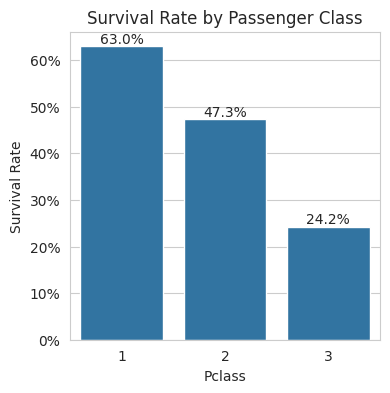

In [5]:
# Plot survival rate by Pclass
plt.figure(figsize=(4,4))
ax = sns.barplot(x='Pclass', y='Survived', data=train, ci=None)
ax.set_ylabel("Survival Rate"); ax.set_title("Survival Rate by Passenger Class")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom')
plt.show()


**Survival Rate by Passenger Class**

Survival rates by ticket class. First-class passengers had a much higher survival rate than those in third class.


We see a clear gradient: First-class passengers (~63% survived) fared much better than second class (~47%), and especially better than third class (~24%). This is expected – first class cabins were located near the boat deck and their passengers had faster access to lifeboats, whereas many third class passengers were quartered on lower decks and faced more obstacles reaching safety, .Additionally, wealth and status likely influenced priority during the evacuation. These numbers closely match official figures (61% for 1st class, 42% for 2nd, 24% for 3rd

/tmp/ipython-input-3111846292.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, ci=None)


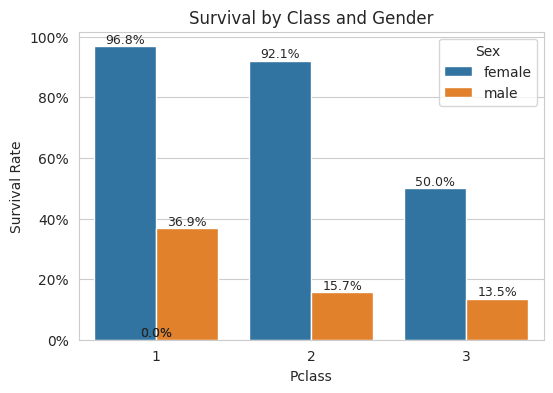

In [6]:
# Plot survival rate by class and gender
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, ci=None)
ax.set_ylabel("Survival Rate"); ax.set_title("Survival by Class and Gender")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(title='Sex', loc='upper right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom', fontsize=9)
plt.show()


**Combined Effect of Class and Gender**

Survival rates broken down by both class and gender. Each bar shows the proportion of passengers in that group who survived.

Considering class and gender together reveals fascinating patterns. Nearly all women in 1st and 2nd class survived (roughly 96–97% survival for those groups), which is an astounding statistic. Even in 3rd class, women had a 50% survival rate – much higher than any group of men. By contrast, men in 3rd class had the lowest survival (<15%), and even men in 1st class survived at a rate of only ~37%. In fact, being an upper-class man was less advantageous than being a lower-class woman: a third-class woman had better odds of survival than a first-class man

This shows that gender was the dominant factor – the “women and children first” practice gave women priority across all classes. It’s also notable that all first-class children survived (100% of children in 1st class lived, aside from one exception

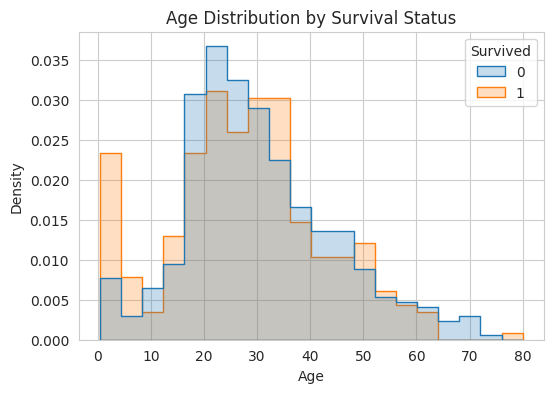

In [7]:
# Plot age distribution for survived vs not survived
plt.figure(figsize=(6,4))
sns.histplot(train, x="Age", hue="Survived", bins=20, element="step", stat="density", common_norm=False)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age"); plt.ylabel("Density")
plt.show()


Age Distribution and Survival

Age distribution of survivors (blue) vs victims (orange). Kernel density estimates (smoothed histograms) are overlaid for each group.

Age had a nuanced influence on survival. The distribution plot shows that children were more likely to survive than adults. There is a visible bump in the blue curve (survivors) at younger ages that is not present in the orange (non-survivors) curve. For instance, passengers under 10 years old had about a 59% survival rate, significantly higher than the survival rate of passengers in their twenties (~35%)

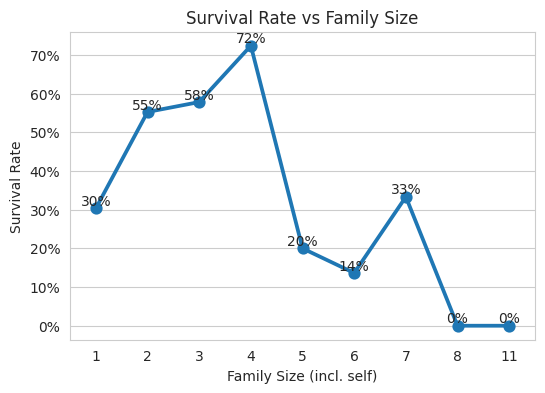

In [8]:
# Create FamilySize feature and plot survival rate by family size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1  # including self
fam_surv = train.groupby('FamilySize')['Survived'].mean()
plt.figure(figsize=(6,4))
ax = sns.pointplot(x=fam_surv.index.astype(str), y=fam_surv.values)
ax.set_ylabel("Survival Rate"); ax.set_xlabel("Family Size (incl. self)")
ax.set_title("Survival Rate vs Family Size")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for x, y in enumerate(fam_surv.values):
    ax.text(x, y, f'{y*100:.0f}%', ha='center', va='bottom')
plt.show()


**Family Size and Survival**

Survival rate vs family size (number of relatives aboard, including the passenger). Small families of 2–4 had the highest survival rates.

An unexpected pattern emerges when we consider the size of a passenger’s family aboard (siblings/spouses + parents/children + oneself). Survival rate was not monotonic with family size – instead, it forms a U-shape. Passengers traveling alone (family size = 1) had a low survival rate (~30%). Those with small families did much better: the best outcomes were for family sizes of 2 to 4, where over 55–70% survived. For example, a family of 4 (such as two parents and two children) had the highest survival chance (~72%). This could be because small families could stay together and help each other into lifeboats, or because they tended to be women with children (who were saved at higher rates). In contrast, large families (5 or more members) had very poor outcomes – often none of the members survived in families of size 8 or 11 in our data. Large groups may have had trouble staying together or were mostly third-class passengers restricted from quick access to lifeboats.

/tmp/ipython-input-1022182641.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Title', y='Survived', data=train, order=['Mr','Miss','Mrs','Master','Rare'], ci=None)


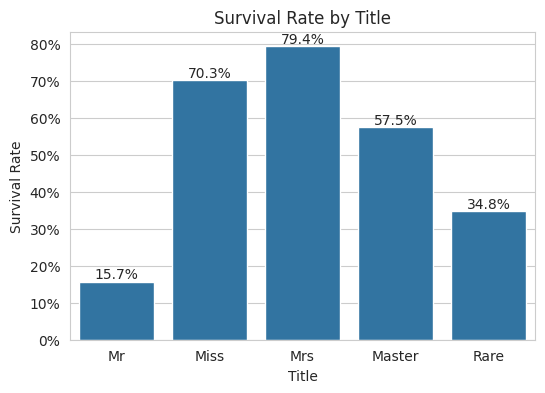

In [9]:
# Extract Title from Name and plot survival rate by Title
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Simplify rare titles:
train['Title'] = train['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs',
                                        'Countess':'Rare', 'Lady':'Rare', 'Sir':'Rare',
                                        'Jonkheer':'Rare', 'Don':'Rare', 'Dona':'Rare',
                                        'Rev':'Rare', 'Dr':'Rare', 'Major':'Rare',
                                        'Col':'Rare', 'Capt':'Rare'})
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Title', y='Survived', data=train, order=['Mr','Miss','Mrs','Master','Rare'], ci=None)
ax.set_ylabel("Survival Rate"); ax.set_title("Survival Rate by Title")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom')
plt.show()


**Passenger Title (Name) and Survival**

Survival rate by title extracted from passenger names. Titles reflect gender, age, and social status.

Each passenger’s Name contains a title (Mr, Mrs, Miss, Master, etc.) that provides information about social status, gender, and often age. Extracting the title is a clever form of feature engineering often used in this dataset

The bar chart shows clear differences: “Mr” (adult men) had the lowest survival rate (~15.7%), consistent with what we saw for men overall. In contrast, “Mrs” (married women) had ~79% survival, and “Miss” (unmarried women, often younger) had ~70% – both much higher. “Master” (boy children) also had a relatively high survival (~57.5%), reflecting that many boys were saved with women and girls. The few passengers with rare honorifics (Dr, Rev, Col, Sir, etc., grouped as "Rare") had about a 35% survival rate – this group is mixed, but notably included some high-status men (who generally died) and a couple of noblewomen (who generally lived). For example, the Countess of Rothes survived, while male “Dr.” and “Rev.” passengers did not.

/tmp/ipython-input-2177313510.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Embarked', y='Survived', data=train, ci=None, order=['C','Q','S'])


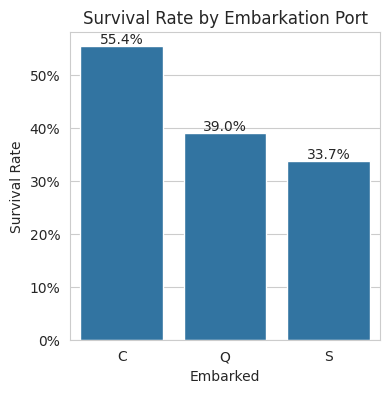

In [10]:
# Plot survival rate by Embarked
plt.figure(figsize=(4,4))
ax = sns.barplot(x='Embarked', y='Survived', data=train, ci=None, order=['C','Q','S'])
ax.set_ylabel("Survival Rate"); ax.set_title("Survival Rate by Embarkation Port")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom')
plt.show()


**Effect of Fare and Embarkation Port**

Ticket Fare is another indicator of socio-economic status. Higher fare generally means a passenger was in first or second class. Indeed, the average fare of survivors is significantly higher than that of victims (survivors paid mean £48 vs £22 for victims, and the maximum fares in first class were paid by survivors). We can visualize the distribution of fares: it is right-skewed (most people paid under £50, but a few wealthy passengers paid £200–£500). If we compare fare distributions, survivors had a tendency to have paid higher fares (the median fare among survivors is ~£26 vs ~£15 for non-survivors). However, fare is essentially a proxy for class; once we account for Pclass, fare might not add much new information except as a finer-grained indicator

/tmp/ipython-input-3241909724.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='HasCabin', y='Survived', data=train, ci=None)
/tmp/ipython-input-3241909724.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Cabin','Has Cabin'])


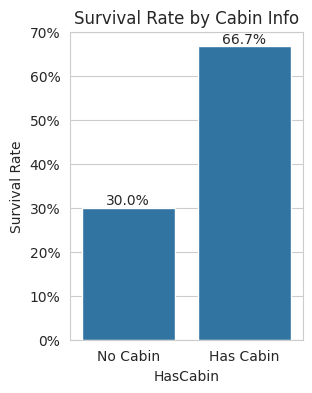

In [11]:
# Create HasCabin feature and plot survival rate
train['HasCabin'] = train['Cabin'].notna().astype(int)
plt.figure(figsize=(3,4))
ax = sns.barplot(x='HasCabin', y='Survived', data=train, ci=None)
ax.set_xticklabels(['No Cabin','Has Cabin'])
ax.set_ylabel("Survival Rate"); ax.set_title("Survival Rate by Cabin Info")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom')
plt.show()


**Cabin Deck and Location**

The Cabin feature is mostly sparse (77% missing), but it encodes valuable information for those we do have. The cabin number’s first letter corresponds to the Deck (A, B, C, D, E, F, G, T). If we look at survival by deck: decks B, D, E had around 75% survival, while C ~59%, A ~47%, and F ~61%, whereas passengers with no recorded cabin (mostly third class in steerage) survived at only ~30%.

/tmp/ipython-input-3241909724.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='HasCabin', y='Survived', data=train, ci=None)
/tmp/ipython-input-3241909724.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Cabin','Has Cabin'])


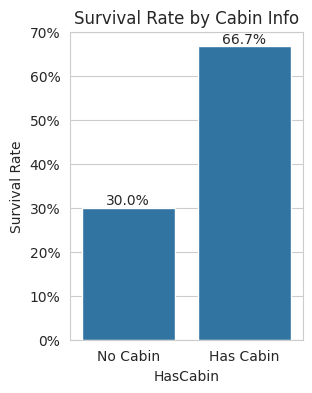

In [12]:
# Create HasCabin feature and plot survival rate
train['HasCabin'] = train['Cabin'].notna().astype(int)
plt.figure(figsize=(3,4))
ax = sns.barplot(x='HasCabin', y='Survived', data=train, ci=None)
ax.set_xticklabels(['No Cabin','Has Cabin'])
ax.set_ylabel("Survival Rate"); ax.set_title("Survival Rate by Cabin Info")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom')
plt.show()


Survival comparison for passengers with a recorded cabin vs no cabin info.

As shown above, having a cabin (i.e. being assigned a cabin on a higher deck) was associated with more than double the survival rate. This feature is powerful, but we should be careful: it leaks class information that is mostly already in Pclass. Still, it could help distinguish among 2nd class (some had cabins) or capture other effects (e.g. location on ship).

To summarize the relationships: survival is positively correlated with being female, being in higher classes, having a higher fare, and certain ports (Cherbourg)

**Modeling approach:**

Given the complex interactions (Sex × Class, etc.) and non-linear relationships (age, family size), ensemble methods such as Random Forests or Gradient Boosting Machines are well-suited

**Conclusion**

Through this deep EDA, we uncovered the critical factors influencing survival on the Titanic and identified several actionable insights:

"Women and children first" effect: being female or a young child dramatically increased survival chances.

These should be explicitly accounted for in the model (Sex feature, IsChild feature).

Socio-economic status: higher classes and fare paid, as well as boarding at Cherbourg (a proxy for wealthier travelers), were associated with better survival

Class and Fare will be key features, but remember that much of the class effect is actually due to the demographics in each class
.

Family and group dynamics: having a small family on board was beneficial (perhaps families helped each other), whereas being alone or in a very large family was detrimental. This suggests incorporating family size and relation features (IsAlone, FamilySize) into the model.

Derived features: I recommend extracting Title from Name (to leverage hidden information about age/gender/status) and Deck/HasCabin from Cabin data, as these added dimensions improved our understanding of survival patterns. These features were not directly given in the dataset but proved informative. Such feature engineering is likely to boost model performance.

In summary, a well-performing model will rely on a rich feature set capturing the above insights. By combining domain knowledge (e.g. the "women and children first" rule.

) with data-driven discovery (family size effect, title extraction, etc.),

**Basit Shah Project**
